In [1]:
using JLD
using Statistics: mean, std
using Plots

┌ Info: Recompiling stale cache file /Users/work/.julia/compiled/v1.0/JLD/l8ijy.ji for JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/work/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


In [7]:
dict = load("../input/raw.jld")

Dict{String,Any} with 2 entries:
  "y_raw" => Symbol[:a440, :a440, :a440, :a440, :a440, :a440, :a440, :a440, :a4…
  "X_raw" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 …

In [8]:
X_raw = dict["X_raw"]
y_raw = dict["y_raw"]

println(summary(X_raw))
println(summary(y_raw));

65×79×1×2250 Array{Float64,4}
2250-element Array{Symbol,1}


In [9]:
mean(X_raw, dims=(3,4))
std(X_raw, dims=(3,4))

65×79×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  

In [10]:
# this works
# ]add UnicodePlots
# https://docs.juliaplots.org/latest/examples/unicodeplots/

In [11]:
X_means = mean(X_raw, dims=(3,4))

X_means[X_means .>  0.5]

21-element Array{Float64,1}:
 0.5044444444444445
 0.5071111111111112
 0.5013333333333334
 0.5084444444444445
 0.5137777777777778
 0.5115555555555555
 0.512             
 0.508             
 0.5093333333333333
 0.5115555555555555
 0.508             
 0.5048888888888889
 0.5084444444444445
 0.516888888888889 
 0.524             
 0.520888888888889 
 0.5111111111111112
 0.504             
 0.5017777777777778
 0.5048888888888889
 0.5031111111111112

In [12]:
X_stdevs = std(X_raw, dims=(3,4))

X_stdevs[X_stdevs .>  0.5]

24-element Array{Float64,1}:
 0.5000985032164356
 0.500111148161871 
 0.50009139029413  
 0.5000605664616427
 0.500109369985736 
 0.5001093699857381
 0.500039818581477 
 0.5000155128268793
 0.5000471298374749
 0.50002401009493  
 0.5000471298374756
 0.5000872410427225
 0.5000398185814767
 0.500095144349063 
 0.500066691861661 
 0.5000398185814744
 0.500107986955492 
 0.5001093699857356
 0.5001014669042027
 0.500047129837475 
 0.5000872410427227
 0.5001014669042009
 0.5000724220066745
 0.5000471298374745

In [13]:
# Normalize images.

epsilon = 1e-15 

X_raw_normed = (X_raw .- mean(X_raw, dims=(3,4))) ./ (std(X_raw, dims=(3,4)) .+ epsilon)



65×79×1×2250 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [14]:
X_means = mean(X_raw_normed, dims=(3,4))

X_means[-0.01 .< X_means .<  0.01]

5135-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [15]:
X_stdevs = std(X_raw_normed, dims=(3,4))

X_stdevs[.99 .< X_stdevs .< 1.1]

3948-element Array{Float64,1}:
 0.9999999999999459
 0.9999999999999549
 0.999999999999941 
 0.9999999999999216
 1.000000000000006 
 0.9999999999999686
 0.9999999999999212
 0.9999999999999366
 0.9999999999999283
 0.9999999999999719
 0.9999999999999185
 0.9999999999999687
 0.9999999999999851
 ⋮                 
 1.0000000000000142
 0.9999999999999396
 0.9999999999999396
 0.9999999999999396
 0.9999999999999624
 0.9999999999999121
 0.9999999999999108
 0.9999999999999486
 0.9999999999999081
 0.9999999999999071
 0.9999999999999103
 0.999999999999914 

In [19]:
using MLDataUtils: shuffleobs, splitobs

┌ Info: Precompiling MLDataUtils [cc2ba9b6-d476-5e6d-8eaf-a92d5412d41d]
└ @ Base loading.jl:1192


In [20]:
] add MLDataUtils

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [21]:
Xs, ys = shuffleobs((X_raw_normed, y_raw))

(X_train, y_train), (X_test, y_test) = splitobs((Xs, ys); at=2/3)
    
@show size(X_train)
@show size(y_train)
@show size(X_test)
@show size(y_test);

size(X_train) = (65, 79, 1, 1500)
size(y_train) = (1500,)
size(X_test) = (65, 79, 1, 750)
size(y_test) = (750,)


In [22]:
using Flux
using Flux: onehotbatch, crossentropy, data, onecold

┌ Info: Recompiling stale cache file /Users/work/.julia/compiled/v1.0/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1190


loaded


In [23]:
y_train_onehot = onehotbatch(y_train, unique(y_train))
y_test_onehot = onehotbatch(y_test, unique(y_test))

println(summary(y_train_onehot))
println(summary(y_test_onehot));

15×1500 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}
15×750 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}


# Split training data into mini-batches

In [24]:
using Base.Iterators

In [25]:
# N features
# M examples total
N, M = size(X_train)

(65, 79, 1, 1500)

In [ ]:
# SKIPPING 

# collect(partition(1:15, 5))

In [ ]:
# SKIPPING

# train = [
#     (X_train[:, :, :, indices], y_train_onehot[:, indices])
#     for indices in partition(1:1500, 100)
# ]

# Each batch is a tuple, (X, y)
# Target structure is [(X, y), (X, y), (X, y), ...]
# Where each (X, y) is a batch.
# y should be dimension K x B, where 
#     K is number of classes
#     B is size of batch

# Within X_train, the dimensions are going to be 
# H - height of image
# W - width of image
# C - number of channels (only 1 for black and white)
# I - the ith image, out of a total of B in the batch.

# train = [
#     (X_train[:, :, :, indices], y_onehot[:, indices])
#     for indices in partition(1:1500, 100)
# ]

summary(train)

# Todo

## Prep Data

<input type="checkbox"> normalize X_raw
<input type="checkbox"> onehot encode y_raw to matrix
<input type="checkbox"> need to do this before shuffling, I think.
<input type="checkbox"> (skip) shuffle order
<input type="checkbox"> (skip) split X_raw, y_raw into train, test sets.

## Define Model
<input type="checkbox"> define model.   Figure out dimensions.
<input type="checkbox"> be able to run one prediction through


## Classify
<input type="checkbox"> define loss function
<input type="checkbox"> crossentropy
<input type="checkbox"> define optimizer
<input type="checkbox"> ADAM
<input type="checkbox"> define callback
<input type="checkbox"> save losses, training accuracy, test accuracy
<input type="checkbox"> training loop
<input type="checkbox"> use @epochs macro

## Analyze
<input type="checkbox"> plot losses
<input type="checkbox"> predict a few classes.
<input type="checkbox"> plot training accuracy
<input type="checkbox"> plot confusion matrix


In [26]:
model = Chain(
  Conv((2,2), 1=>16, relu),
   x -> maxpool(x, (2,2)),
    
   Conv((2,2), 16=>8, relu),
   x -> maxpool(x, (2,2)),
    
   x -> reshape(x, :, size(x, 4)),
    
   Dense(2280, 15), 
  
   softmax
) |> gpu

Chain(Conv((2, 2), 1=>16, NNlib.relu), getfield(Main, Symbol("##3#6"))(), Conv((2, 2), 16=>8, NNlib.relu), getfield(Main, Symbol("##4#7"))(), getfield(Main, Symbol("##5#8"))(), Dense(2280, 15), NNlib.softmax)

In [ ]:
@show size(train[1][1])

model(train[1][1])

In [ ]:
@show summary(model(train[1][1]))
@show summary(train[1][2])

In [27]:
loss(x, y) = crossentropy(model(x), y)

loss (generic function with 1 method)

In [28]:
# sanity check, make sure it works
#loss(normalized_images, y_onehot)

In [29]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

opt = ADAM(params(model))

#43 (generic function with 1 method)

In [ ]:
# Why is this necessary?  Not sure.
test_batch = X_test[:, :, :, 1:end]

# ŷ_test_proba = model(test_batch)

In [ ]:
# losses = Float64[]
# train_accuracies = Float64[]
# test_accuracies = Float64[]

# function evalcb()
# #    train1_images, train1_labels = train[1]

# #     train1_images = data(train1_images)
# #     train1_labels = data(train1_labels)

# #     push!(losses,           loss(    train1_images, train1_labels))
# #     push!(train_accuracies, accuracy(train1_images, train1_labels))

#     push!(test_accuracies, accuracy(test_batch, y_test))
# end


In [30]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))
test_accuracies = Float64[]

0-element Array{Float64,1}

In [33]:
# Why is this necessary?
X_train_copy = copy(X_train)

65×79×1×1500 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [35]:
losses = []
accuracies = []

0-element Array{Any,1}

1
2
3
4
5
6
7
8
9
10
accuracies = Any[0.107333, 0.112, 0.112667, 0.124, 0.134667, 0.157333, 0.192, 0.24, 0.3, 0.355333, 0.436, 0.512, 0.572667, 0.614667, 0.644, 0.654, 0.673333, 0.687333, 0.702, 0.723333, 0.74, 0.758, 0.772, 0.783333, 0.786]


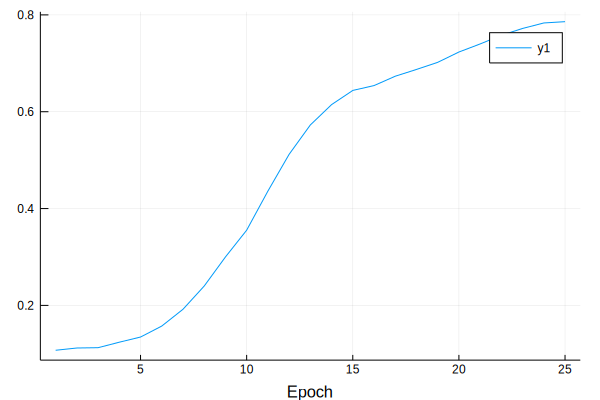

In [41]:


for i in 1:10
    Flux.train!(loss, [(X_train_copy, y_train_onehot)], opt)

    push!(losses, data(loss(X_train_copy, y_train_onehot)))
    push!(accuracies, accuracy(X_train_copy, y_train_onehot))
    
    @show accuracies
    
#    test_accuracy = accuracy(test_batch, y_test)

#    push!(test_accuracies, test_accuracy)
end    
    
@show accuracies
plot(accuracies, xlabel="Epoch")

5-element Array{Any,1}:
 0.10733333333333334
 0.112              
 0.11266666666666666
 0.124              
 0.13466666666666666